# Rethabile Mphahlele
# Titanic: Machine Learning from Disaster

# Importing the libriaries

In [2]:
# Regular EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# I want my plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


# Importing the datasets

In [3]:
train_dataset= pd.read_csv('train.csv')
test_dataset=  pd.read_csv('test.csv')
gender_sub=    pd.read_csv('gender_submission.csv')

# Data Exploration (exploratory data analysis or EDA)

In [10]:
# checking the top 10 rows of our dataframe
train_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
test_dataset.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [12]:
#checking the shape of the dataframes
train_dataset.shape, test_dataset.shape

((891, 12), (418, 11))

value_counts() allows you to show how many times each of the values of a categorical column appear.

In [13]:
# Let's see how many survived (1) and not-survived (0) samples we have in our dataframe
train_dataset.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Since these two values are not close to even, our target column can be considered **unbalanced.**

An unbalanced target column, meaning some classes have far more samples.

If you'd prefer these values in percentages, value_counts() takes a parameter, normalize which can be set to true.

In [15]:
# Normalized value counts
round(train_dataset.Survived.value_counts(normalize=True),2)

0    0.62
1    0.38
Name: Survived, dtype: float64


We can plot the target column value counts by calling the plot() function and telling it what kind of plot we'd like, in this case, bar is good.

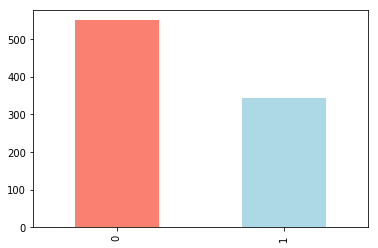

In [16]:
# Plot the value counts with a bar graph
train_dataset.Survived.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

.info() shows a quick insight to the number of missing values you have and what type of data your working with.

.describe() shows a range of different metrics about your numerical columns such as mean, max and standard deviation.

In [17]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [44]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [45]:
test_dataset.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.154603,0.447368,0.392344,35.619000
std,120.810458,0.841838,12.636666,0.896760,0.981429,55.840751
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In our case, there are missing values and we have 3 types of data types namely;
- float
- int
- object

# Dealing with missing values

In [23]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
train_dataset.loc[:, train_dataset.isnull().any()].head()

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S


In [32]:
test_dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
test_dataset.loc[:, test_dataset.isnull().any()].head()

,Age,Fare,Cabin
0,34.5,7.8292,NaN
1,47.0,7.0000,NaN
2,62.0,9.6875,NaN
3,27.0,8.6625,NaN
4,22.0,12.2875,NaN


What we'll do is fill the rows where object values are missing with "missing", the numerical features with the mean


### Filling in the missing values

In [34]:
train_dataset['Age'].mean()

29.69911764705882

In [35]:
# Filling in the "Age" column
train_dataset['Age'].fillna(train_dataset['Age'].mean(), inplace=True)
test_dataset['Age'].fillna(train_dataset['Age'].mean(), inplace=True)

In [36]:
# Filling in the "Fare" column
test_dataset['Fare'].fillna(train_dataset['Fare'].mean(), inplace=True)

In [37]:
# Filling in the "Cabin" column
train_dataset['Cabin'].fillna("missing", inplace=True)
test_dataset['Cabin'].fillna("missing", inplace=True)

In [38]:
# Filling in the "Embarked" column
train_dataset['Embarked'].fillna("missing", inplace=True)

In [40]:
sum(train_dataset.isnull().sum())

0

In [41]:
sum(test_dataset.isnull().sum())

0

We've filled in the missing values, now there's no more missing values.

# Survival Frequency according to Gender

In [47]:
train_dataset.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [49]:
test_dataset.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [50]:
# Comparing target column with sex column
pd.crosstab(train_dataset.Survived, train_dataset.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


What can we infer from this?

Since there are about 314 women and 233 of them have a postive value , showing that they survived, we might infer, based on this one variable if the participant is a woman, there's a 74% chance she will survive.

As for males, there's about 577 total with around 109 indicating a presence of survival. So we might predict, if the participant is male, 19% of the time he will survive.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 46.5% chance they will survive.

This can be our very simple baseline, we'll try to beat it with machine learning.

# Making our crosstab visual¶
You can plot the crosstab by using the plot() function and passing it a few parameters such as, kind (the type of plot you want), figsize=(length, width) (how big you want it to be) and color=[colour_1, colour_2] (the different colours you'd like to use).

Different metrics are represented best with different kinds of plots. In our case, a bar graph is great.

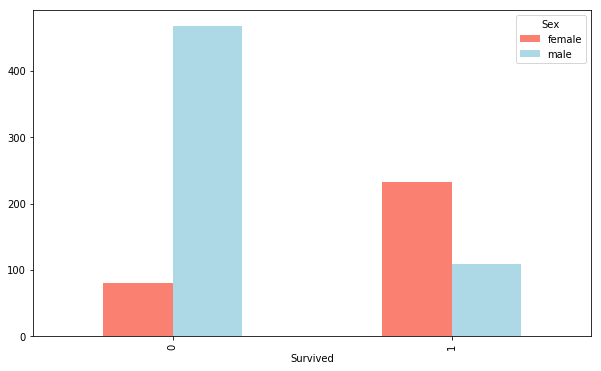

In [62]:
# Creating a plot
pd.crosstab(train_dataset.Survived, train_dataset.Sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);



Nice! But our plot is looking pretty bare. Let's add some attributes.

We'll create the plot again with crosstab() and plot(), then add some helpful labels to it with plt.title(), plt.xlabel() and more.

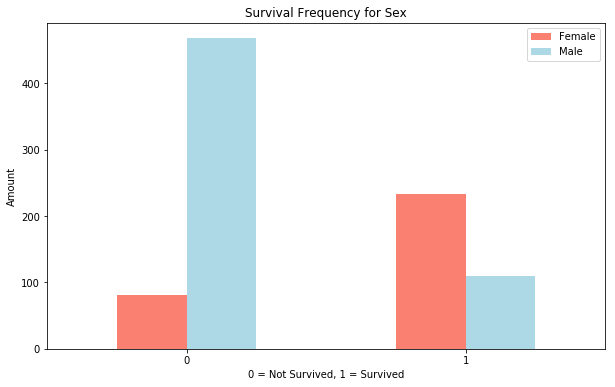

In [63]:
# Creating a plot
pd.crosstab(train_dataset.Survived, train_dataset.Sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Adding some attributes to it
plt.title("Survival Frequency for Sex")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keeping the labels on the x-axis vertical

What can we infer from this?

It seems the younger someone is, the higher their survival rate (dots are higher on the left of the graph) and the older someone is, the more blue dots there are. But this may be because there are more dots all together on the right side of the graph (older participants).

Both of these are observational of course, but this is what we're trying to do, build an understanding of the data.



#### Let's check the age distribution.

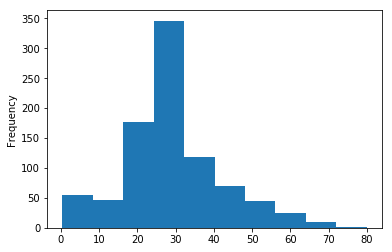

In [68]:
# Histograms are a great way to check the distribution of a variable
train_dataset.Age.plot.hist();

We can see it's a normal distribution but slightly swaying to the left, which reflects in the scatter plot above.

Let's keep going.

# Survival Frequency per Ticket Class

Let's try another independent variable. This time, PClass (Ticket Class).

We'll use the same process as we did before with sex.

In [71]:

pd.crosstab(train_dataset.Pclass, train_dataset.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


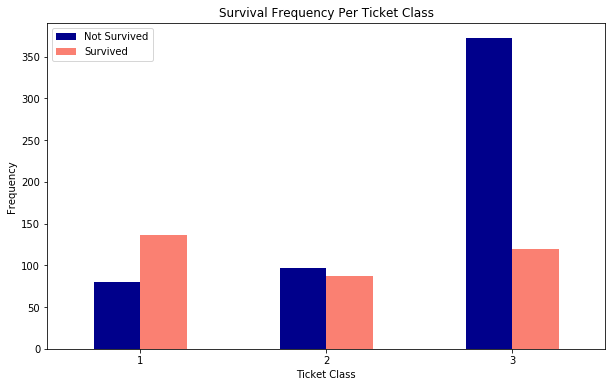

In [73]:

# Create a new crosstab and base plot
pd.crosstab(train_dataset.Pclass, train_dataset.Survived).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["darkblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Survival Frequency Per Ticket Class")
plt.xlabel("Ticket Class")
plt.ylabel("Frequency")
plt.legend(["Not Survived", "Survived"])
plt.xticks(rotation = 0);

What can we infer from this?

From our data dictionary the different classes of the Ticket classes are;

pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

Therefore , the graph above shows that the passengers in the upper class have a higher chance of surviving than those in the lower class.

`Before going any further , we are going to drop the following columns as they will not add any value;`


-PassengerId

-Name

-Ticket- (Ticket number)

In [78]:
train_dataset.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)

In [80]:
test_dataset.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)

In [81]:
train_dataset.shape, test_dataset.shape

((891, 9), (418, 8))

In [82]:
train_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,missing,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,missing,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,missing,S


In [90]:
train_dataset.Sex.nunique(), train_dataset.Sex.nunique()

(2, 2)

In [89]:
train_dataset.Cabin.nunique(),test_dataset.Cabin.nunique()

(148, 77)

In [91]:
train_dataset.Embarked.nunique(),test_dataset.Embarked.nunique()

(4, 3)

# Correlation between independent variables
Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using .corr() which will create a correlation matrix for us, in other words, a big table of numbers telling us how related each variable is the other.

In [93]:

# Find the correlation between our independent variables
corr_matrix = train_dataset.corr()
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


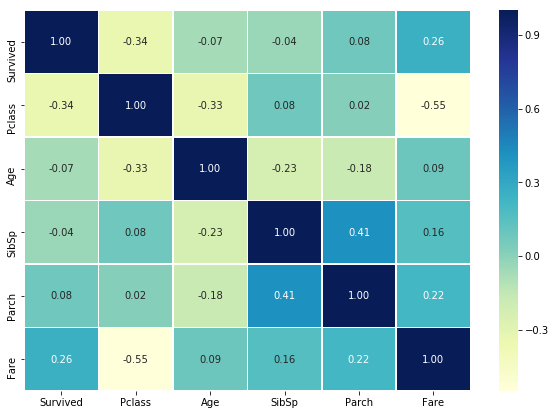

In [96]:
# Let's make it look a little prettier
corr_matrix = train_dataset.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");


Much better. A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

#### Enough EDA, let's model


______

# Modeling
We've explored the data, now we'll try to use machine learning to predict our target variable based on the independent variables.

`Remember our problem?`

**what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc)**

That's what we'll be trying to answer.

`And our evaluation metric?`

**We must reach 80% accuracy at predicting whether or not a patient has survived.**

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.

Let's look at it again.

In [97]:
train_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,missing,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,missing,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,missing,S


We're trying to predict our target variable using all of the other variables except Cabin and Embarked as it has imbalanced values.

To do this, we'll split the target variable from the rest.

In [98]:

# Everything except target variable,Cabin and Embarked variables 
X = train_dataset.drop(['Survived','Cabin','Embarked'], axis=1)

#Do the same for the test dataset
X_TEST=test_dataset.drop(['Cabin','Embarked'], axis=1)                         

# Target variable
y = train_dataset.Survived.values

In [99]:
X.shape, X_TEST.shape

((891, 6), (418, 6))

Let's see our new variables.

In [100]:
# Independent variables (no target column)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [103]:
# Targets
y[:15]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

# Now we are going to change object values to numerical values

In [104]:
X= pd.get_dummies(X,drop_first=True)
X_TEST= pd.get_dummies(X_TEST,drop_first=True)

In [105]:
X.shape,X_TEST.shape

((891, 6), (418, 6))

In [106]:
X.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0


In [107]:
X_TEST.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1


### Training and test split
Now comes one of the most important concepts in machine learning, the training/test split.

This is where you'll split your data into a training set and a test set.

You use your training set to train your model and your test set to test it.

The test set must remain separate from your training set.

In [108]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

Let's look at our training data.

In [109]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
331,1,45.5,0,0,28.5000,1
733,2,23.0,0,0,13.0000,1
382,3,32.0,0,0,7.9250,1
704,3,26.0,1,0,7.8542,1
813,3,6.0,4,2,31.2750,0


In [111]:
y_train[:15], len(y_train)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64), 712)


Beautiful, we can see we're using 712 samples to train on. Let's look at our test data.

In [112]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
709,3,29.699118,1,1,15.2458,1
439,2,31.000000,0,0,10.5000,1
840,3,20.000000,0,0,7.9250,1
720,2,6.000000,0,1,33.0000,0
39,3,14.000000,1,0,11.2417,0


In [113]:
y_test[:15], len(y_test)

(array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64), 179)


And we've got 179 examples we'll test our model(s) on. Let's build some.

# Model choices
Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

- Logistic Regression - LogisticRegression()
- K-Nearest Neighbors - KNeighboursClassifier()
- RandomForest - RandomForestClassifier()

In [116]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    
    # Make a list to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [117]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'KNN': 0.6871508379888268,
 'Logistic Regression': 0.7932960893854749,
 'Random Forest': 0.8100558659217877}

Beautiful! Since our models are fitting, let's compare them visually.

# Model Comparison
Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

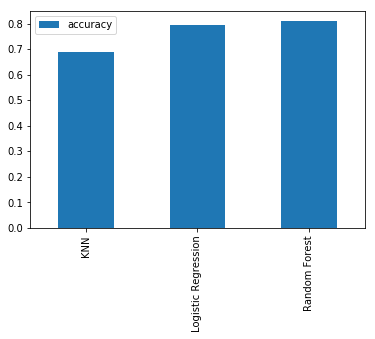

In [119]:

model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Beautiful! We can't really see it from the graph but looking at the dictionary, the Random Forest() model performs best.

# Predicting the test values using Random Forest

In [120]:
# Random seed for reproducible results
np.random.seed(42)
    
# Institate and fit the model (on the training set)
Random_forest_model= RandomForestClassifier()
Random_forest_model.fit(X_train,y_train)

# Check the score of the model (on the test set)
Random_forest_model.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8100558659217877

In [122]:
Random_forest_testset_preds= Random_forest_model.predict(X_TEST)

In [123]:
Random_forest_testset_preds[:15]

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

# Kaggle File

In [126]:
test_data= pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [130]:
Titanic_RF_file=pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': Random_forest_testset_preds})

In [132]:
Titanic_RF_file.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [133]:
Titanic_RF_file.to_csv('Titanic_RF_pred_08.05.2020.csv', index = False)

Name
Submitted
Wait time
Execution time
Score
Titanic_RF_pred_08.05.2020.csv
just now
0 seconds
0 seconds
0.74641

# Hyperparameter tuning with RandomizedSearchCV
Scikit-Learn's RandomizedSearchCV allows us to randomly search across different hyperparameters to see which work best. It also stores details about the ones which work best!

Let's see it in action.

First, we create a grid (dictionary) of hyperparameters we'd like to search over.

In [134]:
# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [135]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all cores 
random_model = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
random_clf = RandomizedSearchCV(estimator=random_model,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
random_clf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=1000, min_samples_split=4, min_samples_le

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


When RandomizedSearchCV goes through n_iter combinations of of hyperparameter search space, it stores the best ones in the attribute best_params_.

In [136]:
# Find the best hyperparameters found by RandomizedSearchCV
random_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

Now when we call predict() on random_clf (our RandomizedSearchCV version of our classifier), it'll use the best hyperparameters it found.

In [137]:
# Make predictions with the best hyperparameters
random_y_preds = random_clf.predict(X_TEST)


In [138]:
random_y_preds[:15]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [139]:
Titanic_RF_CV_file=pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': random_y_preds})

In [140]:
Titanic_RF_CV_file.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [141]:
Titanic_RF_CV_file.to_csv('Titanic_RF_pred_2_08.05.2020.csv', index = False)

Score= 0.77511

____

In [143]:
rf= RandomForestClassifier(n_estimators=100)
rf.fit(X,y)
rf_predict= rf.predict(X_TEST)
rf_df=pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': rf_predict})
rf_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [144]:
rf_df.to_csv('rf_pred_3_08.05.2020.csv', index = False)

Name
Submitted
Wait time
Execution time
Score
rf_pred_3_08.05.2020.csv
just now
0 seconds
0 seconds
0.73205

_____

In [146]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [147]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [148]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [149]:
rs_log_reg.score(X_test, y_test)

0.7932960893854749

In [150]:

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   58.7s finished


In [151]:
# Find the best parameters
rs_rf.best_params_


{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [152]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8044692737430168

In [153]:
log_reg_1= rs_log_reg.predict(X_TEST)

In [155]:
random_rf_1= rs_rf.predict(X_TEST)

# Simple Average

In [173]:
simple_avg_1 = np.round((log_reg_1 + random_rf_1 )/2)

rf_avg_1=pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': simple_avg_1})
rf_avg_1['Survived']= rf_avg_1['Survived'].astype(int)
rf_avg_1.to_csv('simple_4.1_08.05.2020.csv', index = False)


Name
Submitted
Wait time
Execution time
Score
simple_4.1_08.05.2020.csv
just now
0 seconds
0 seconds
0.78468

___

# Conclusion

We began our exercise, by exploring the dataset, asking questions and finding answers through visualizations. We treated missing values and replaced them appropriately. We also converted the categorical variables using dummy variables. We then built a bunch of machine learning models and compared them to find the best model.
This is only just of the many many ways we could approach the problem.

There is definitely room for improvement. And I am sure with a more complex data processing strategies, feature engineering and model tuning, I could get a better score.

So for now I could only achieve a score of 0.78468, by averaging Logistic and Random Forest models.


